In [ ]:
%pip install -e git+https://github.com/UN-GCPDS/python-gcpds.MI_prediction.git#egg=MI_prediction

In [1]:
from MI_prediction.Utils.Datasets import DataLoader, DataLoader_Rest, get_epochs, get_runs
from MI_prediction.Datasets import Cho2017_Rest, BNCI2014001_Rest
from braindecode.preprocessing.preprocess import exponential_moving_standardize, preprocess, Preprocessor, scale
import numpy as np

In [2]:
import requests

# BCI2a

In [3]:
dl = DataLoader(dataset_name="BNCI2014001")

In [4]:
dl.load_data(subject_ids=[1])

48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]


In [5]:
dl.dataset.datasets[0].raw.info['ch_names']

['Fz',
 'FC3',
 'FC1',
 'FCz',
 'FC2',
 'FC4',
 'C5',
 'C3',
 'C1',
 'Cz',
 'C2',
 'C4',
 'C6',
 'CP3',
 'CP1',
 'CPz',
 'CP2',
 'CP4',
 'P1',
 'Pz',
 'P2',
 'POz',
 'EOG1',
 'EOG2',
 'EOG3',
 'stim']

In [6]:
X.shape

NameError: name 'X' is not defined

In [55]:
y

array([1, 2, 2, 1, 2, 1, 2, 0, 2, 3, 1, 0, 2, 1, 3, 3, 3, 3, 3, 1, 0, 2,
       1, 1, 0, 3, 1, 0, 0, 0, 1, 2, 1, 2, 2, 1, 2, 0, 2, 0, 0, 3, 0, 0,
       3, 3, 3, 3, 3, 0, 2, 1, 1, 2, 0, 3, 2, 0, 1, 1, 1, 3, 2, 2, 1, 1,
       0, 1, 2, 3, 3, 0, 1, 3, 3, 2, 3, 3, 2, 1, 2, 0, 0, 0, 3, 0, 1, 3,
       2, 0, 2, 0, 3, 2, 0, 1, 1, 1, 3, 2, 1, 0, 1, 0, 2, 3, 1, 0, 0, 1,
       0, 2, 3, 3, 3, 0, 1, 3, 2, 3, 2, 1, 0, 2, 1, 0, 0, 1, 0, 3, 3, 2,
       1, 2, 3, 2, 3, 0, 2, 2, 2, 0, 3, 1, 2, 3, 1, 0, 0, 3, 1, 1, 0, 2,
       3, 3, 3, 2, 1, 0, 2, 3, 1, 3, 0, 2, 3, 3, 1, 2, 2, 0, 3, 2, 1, 1,
       3, 2, 1, 0, 2, 2, 0, 1, 3, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 0, 0, 2,
       0, 3, 1, 3, 1, 1, 2, 3, 0, 2, 3, 0, 3, 0, 3, 2, 2, 3, 1, 2, 2, 2,
       0, 3, 1, 3, 1, 0, 1, 3, 1, 0, 1, 2, 0, 0, 3, 1, 2, 3, 2, 0, 0, 1,
       3, 2, 3, 1, 1, 0, 0, 2, 3, 2, 2, 1, 2, 3, 3, 2, 2, 2, 2, 3, 3, 0,
       3, 1, 2, 0, 2, 1, 3, 1, 3, 1, 1, 1, 1, 0, 0, 3, 2, 0, 0, 0, 3, 0,
       1, 0])

In [49]:
X.shape[-1]/dl.get_fs()

7.0

In [56]:
trials['win_0'].split('session')['session_E'].split('run')

{'run_0': <braindecode.datasets.base.BaseConcatDataset at 0x16d382df0>,
 'run_1': <braindecode.datasets.base.BaseConcatDataset at 0x16d382670>,
 'run_2': <braindecode.datasets.base.BaseConcatDataset at 0x16d394e80>,
 'run_3': <braindecode.datasets.base.BaseConcatDataset at 0x16d3943d0>,
 'run_4': <braindecode.datasets.base.BaseConcatDataset at 0x16d3ddfd0>,
 'run_5': <braindecode.datasets.base.BaseConcatDataset at 0x16d3ddb20>}

## Create channel names

In [16]:
url = 'http://127.0.0.1:8000/api/channel'

for ch in dl.dataset.datasets[0].raw.info['ch_names']:
    payload = {'channel_name': ch}
    try:
        response = requests.post(url, data=payload)
        response.raise_for_status()  # Lanza una excepción si la respuesta tiene un código de estado diferente a 2xx
        print(response.json())
    except requests.exceptions.HTTPError as error:
        print('La solicitud no se pudo completar:', error)
    except requests.exceptions.RequestException as error:
        print('Se produjo un error al realizar la solicitud:', error)


{'channel_name': 'Fz'}
{'channel_name': 'FC3'}
{'channel_name': 'FC1'}
{'channel_name': 'FCz'}
{'channel_name': 'FC2'}
{'channel_name': 'FC4'}
{'channel_name': 'C5'}
{'channel_name': 'C3'}
{'channel_name': 'C1'}
{'channel_name': 'Cz'}
{'channel_name': 'C2'}
{'channel_name': 'C4'}
{'channel_name': 'C6'}
{'channel_name': 'CP3'}
{'channel_name': 'CP1'}
{'channel_name': 'CPz'}
{'channel_name': 'CP2'}
{'channel_name': 'CP4'}
{'channel_name': 'P1'}
{'channel_name': 'Pz'}
{'channel_name': 'P2'}
{'channel_name': 'POz'}
{'channel_name': 'EOG1'}
{'channel_name': 'EOG2'}
{'channel_name': 'EOG3'}
{'channel_name': 'stim'}


In [18]:
url = 'http://127.0.0.1:8000/api/subject'

for s in range(1, 10):
    payload = {
        'subject_id': s,
        'description': 'Subject A0' + str(s),
        }
    try:
        response = requests.post(url, data=payload)
        response.raise_for_status()  # Lanza una excepción si la respuesta tiene un código de estado diferente a 2xx
        print(response.json())
    except requests.exceptions.HTTPError as error:
        print('La solicitud no se pudo completar:', error)
    except requests.exceptions.RequestException as error:
        print('Se produjo un error al realizar la solicitud:', error)

La solicitud no se pudo completar: 400 Client Error: Bad Request for url: http://127.0.0.1:8000/api/subject
{'subject_id': 2, 'description': 'Subject A02'}
{'subject_id': 3, 'description': 'Subject A03'}
{'subject_id': 4, 'description': 'Subject A04'}
{'subject_id': 5, 'description': 'Subject A05'}
{'subject_id': 6, 'description': 'Subject A06'}
{'subject_id': 7, 'description': 'Subject A07'}
{'subject_id': 8, 'description': 'Subject A08'}
{'subject_id': 9, 'description': 'Subject A09'}


## Create time series

In [59]:
dl.load_data(subject_ids=[1])

48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]


In [60]:
trials = dl.get_trials(start_offset=[-2], end_offset=[1])
X,y = get_epochs(trials['win_0'].split('session')['session_E'])

Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']


In [61]:
print(X.shape, y.shape)

(288, 26, 1750) (288,)


In [110]:
t = list(np.linspace(-2, X.shape[-1]/dl.get_fs()-2, X.shape[-1]))
fs = dl.get_fs()

In [111]:
trial = 0
channel = 0
ts = list(X[trial,channel,:])
print(len(ts))
print(len(t))

1750
1750


In [113]:
y

array([1, 2, 2, 1, 2, 1, 2, 0, 2, 3, 1, 0, 2, 1, 3, 3, 3, 3, 3, 1, 0, 2,
       1, 1, 0, 3, 1, 0, 0, 0, 1, 2, 1, 2, 2, 1, 2, 0, 2, 0, 0, 3, 0, 0,
       3, 3, 3, 3, 3, 0, 2, 1, 1, 2, 0, 3, 2, 0, 1, 1, 1, 3, 2, 2, 1, 1,
       0, 1, 2, 3, 3, 0, 1, 3, 3, 2, 3, 3, 2, 1, 2, 0, 0, 0, 3, 0, 1, 3,
       2, 0, 2, 0, 3, 2, 0, 1, 1, 1, 3, 2, 1, 0, 1, 0, 2, 3, 1, 0, 0, 1,
       0, 2, 3, 3, 3, 0, 1, 3, 2, 3, 2, 1, 0, 2, 1, 0, 0, 1, 0, 3, 3, 2,
       1, 2, 3, 2, 3, 0, 2, 2, 2, 0, 3, 1, 2, 3, 1, 0, 0, 3, 1, 1, 0, 2,
       3, 3, 3, 2, 1, 0, 2, 3, 1, 3, 0, 2, 3, 3, 1, 2, 2, 0, 3, 2, 1, 1,
       3, 2, 1, 0, 2, 2, 0, 1, 3, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 0, 0, 2,
       0, 3, 1, 3, 1, 1, 2, 3, 0, 2, 3, 0, 3, 0, 3, 2, 2, 3, 1, 2, 2, 2,
       0, 3, 1, 3, 1, 0, 1, 3, 1, 0, 1, 2, 0, 0, 3, 1, 2, 3, 2, 0, 0, 1,
       3, 2, 3, 1, 1, 0, 0, 2, 3, 2, 2, 1, 2, 3, 3, 2, 2, 2, 2, 3, 3, 0,
       3, 1, 2, 0, 2, 1, 3, 1, 3, 1, 1, 1, 1, 0, 0, 3, 2, 0, 0, 0, 3, 0,
       1, 0])

In [112]:
y[0]

1

In [80]:
import matplotlib.pyplot as plt

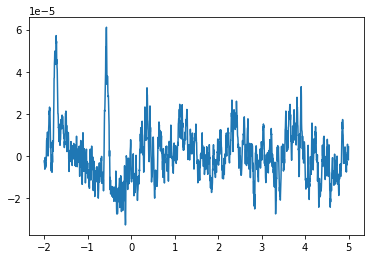

In [81]:
plt.plot(t,ts)
plt.show()

In [82]:
trials1 = dl.get_trials(start_offset=[0], end_offset=[0])
X1,y1 = get_epochs(trials1['win_0'].split('session')['session_E'])

Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']


In [88]:
-1*fs

-250.0

In [108]:
np.sum((ts[int(2*fs):int(6*fs)])-X1[0,0,:])

0.0

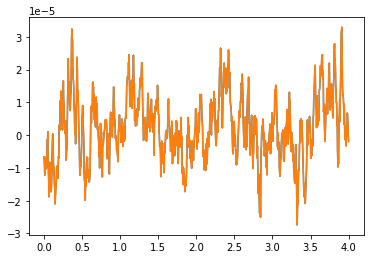

In [109]:
plt.plot(t[int(2*fs):int(6*fs)],X1[0,0,:])
plt.plot(t[int(2*fs):int(6*fs)],ts[int(2*fs):int(6*fs)])
plt.show()

In [118]:
url = 'http://127.0.0.1:8000/api/timeserie'


payload = {
    'time': t,
    'value': ts,
    'subject_id': 1,
    'trial': 0,
    'class_id': y[0]+1,
    'session': 'Training',
    'run': 0,
    'channel': 'Fz',
    }
try:
    response = requests.post(url, data=payload)
    response.raise_for_status()  # Lanza una excepción si la respuesta tiene un código de estado diferente a 2xx
    print(response.json())
except requests.exceptions.HTTPError as error:
    print('La solicitud no se pudo completar:', error)
except requests.exceptions.RequestException as error:
    print('Se produjo un error al realizar la solicitud:', error)

{'time': [-2.0, -1.995997712978845, -1.9919954259576902, -1.987993138936535, -1.9839908519153802, -1.9799885648942253, -1.9759862778730704, -1.9719839908519154, -1.9679817038307603, -1.9639794168096054, -1.9599771297884505, -1.9559748427672956, -1.9519725557461407, -1.9479702687249858, -1.9439679817038307, -1.9399656946826758, -1.9359634076615209, -1.931961120640366, -1.927958833619211, -1.923956546598056, -1.919954259576901, -1.9159519725557461, -1.9119496855345912, -1.9079473985134363, -1.9039451114922814, -1.8999428244711263, -1.8959405374499714, -1.8919382504288165, -1.8879359634076616, -1.8839336763865067, -1.8799313893653515, -1.8759291023441966, -1.8719268153230417, -1.8679245283018868, -1.863922241280732, -1.8599199542595768, -1.8559176672384219, -1.851915380217267, -1.847913093196112, -1.8439108061749572, -1.839908519153802, -1.8359062321326471, -1.8319039451114922, -1.8279016580903373, -1.8238993710691824, -1.8198970840480273, -1.8158947970268724, -1.8118925100057175, -1.8078

## GET DATA

In [16]:
url = 'http://127.0.0.1:8000/api/timeserie'

response = requests.get(url)

In [17]:
response.json()

[{'id': 1,
  'time': -2.0,
  'value': -2.2949218e-06,
  'trial': 0,
  'run': 0,
  'subject_id': 1,
  'class_id': 2,
  'session': 'Training',
  'channel': 'Fz'},
 {'id': 2,
  'time': -1.995997712978845,
  'value': -3.125e-06,
  'trial': 0,
  'run': 0,
  'subject_id': 1,
  'class_id': 2,
  'session': 'Training',
  'channel': 'Fz'},
 {'id': 3,
  'time': -1.9919954259576902,
  'value': -3.2714843e-06,
  'trial': 0,
  'run': 0,
  'subject_id': 1,
  'class_id': 2,
  'session': 'Training',
  'channel': 'Fz'},
 {'id': 4,
  'time': -1.987993138936535,
  'value': -4.6386717e-06,
  'trial': 0,
  'run': 0,
  'subject_id': 1,
  'class_id': 2,
  'session': 'Training',
  'channel': 'Fz'},
 {'id': 5,
  'time': -1.9839908519153802,
  'value': -6.201172e-06,
  'trial': 0,
  'run': 0,
  'subject_id': 1,
  'class_id': 2,
  'session': 'Training',
  'channel': 'Fz'},
 {'id': 6,
  'time': -1.9799885648942253,
  'value': -1.9042968e-06,
  'trial': 0,
  'run': 0,
  'subject_id': 1,
  'class_id': 2,
  'session'